<center><h1>Designing a Grid World Environment </h1></center>

## Ziad Al-Ziadi and Behzad Javaheri

#### Task 1 Deep Reinforcement Learning

#### Code borrowed: Total: ~30%. 
Sources: Lab 02, Lab 04 and 
Denny Britz’s Gridworld from GitHub: https://github.com/dennybritz/reinforcement-learning/blob/cee9e78652f8ce98d6079282daf20680e5e17c6a/lib/envs/gridworld.py

In [1]:
##Importing required libraries
import numpy as np 
import pandas as pd 

### 1. The Task

In this task a tabular reinforcement learning (RL) environment that follows a Markow Decision Process (MDP) will be developed. Details of elements of this environment (states, action and rewards) are provided below.

#### 1.1 The environment

Here we will define 3 elements of the environment: state, actions and rewards.

Our environment is a 5x5 grid with an agent (a mouse) on stochastic starting point (e.g. C0: 0, 0) aiming to reach an stochastic end-goal (e.g. C24: 4, 4).

#### 1.2 States
The states in this environment are all of the possible locations within the grid. One of this location is a stochastic terminal negative state (e.g. trap: 3, 3), while other locations are available for the mouse to move freely. One state is for the stochastic intermediate reward (e.g. cheese: 2,2)

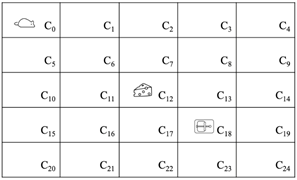 

There are 25 ppossible locations (states) within this grid. Each location is identified by its row and column index.

#### 1.3 Actions

We next define the actions that can be available to the agent. The agent can move in four directions:
Up, Right, Down, Left

#### 1.4 Rewards

The next element of the environment is rewards: a scalar feedback mechanism.

This reward systems will assign a reward (positive or negative) to each available state (locations in the grid).

The mouse begins stochastically for example at (0, 0) aiming reach stochastic end-goal for example (C24: 4, 4) and take this journey by maximising its total rewards.

We use negative rewards(-1) in all states except the end-goal annd cheese to prevent the agent looping in the environment to maximise its rewards without reaching the goal. This approach encourages the agent to find the shortest possible route (to avoid high negative rewards) to reach goal (positive reward). Big rewards are assigned to terminal states of trap (-100) and end-goal (+100). The intermediate reward cheese state carries an award of +4.

In [3]:
class MouseGrid:
    def __init__(self):
        # defing our tabular grid environment for our mouse (agent)

        self.h = 5 # height of our tabular grid
        self.w = 5 # width of our tabular grid
        self.grid = np.zeros((self.h, self.w)) - 1
        self.current_state = (4, np.random.randint(0, 5)) # the stochastic current location of the mouse

        
        self.cheese_coord = (4, np.random.randint(0, 5)) # the stochastic current location of the cheese
        self.trap_coord = (4, np.random.randint(0, 5)) # the stochastic current location of the trap
        self.exit_coord = (4, np.random.randint(0, 5)) # the stochastic current location of the end-goal
        self.end_states = [self.exit_coord, self.trap_coord]
        self.grid[self.exit_coord[0], self.exit_coord[1]] = 100 # setting a postive reward for reaching end state
        self.grid[self.cheese_coord[0], self.cheese_coord[1]] = 4 # setting a postive reward for our cheese
        self.grid[self.trap_coord[0], self.trap_coord[1]] = -100 # setting a negative rewards for our mousetrap
        self.actions = ["Up", "Down", "Left", "Right"] # the different actions our mouse can take

    def getAction(self):
        return self.actions

    def gridAgent(self):
        
        grid = np.zeros((self.h, self.w))
        grid[self.current_state[0], self.current_state[1]] = 1
        return grid

    def getReward(self, new_state):
        return self.grid[new_state[0], new_state[1]]

    def takeAction(self, action):
        previous_state = self.current_state

        if action == "Up":
            if previous_state[0] == 0:
                reward = self.getReward(previous_state)
            else:
                self.current_state = (self.current_state[0] - 1, self.current_state[1])
                reward = self.getReward(self.current_state)

        elif action == "Down":
            if previous_state[0] == self.h - 1:
                reward = self.getReward(previous_state)
            else:
                self.current_state = (self.current_state[0] + 1, self.current_state[1])
                reward = self.getReward(self.current_state)

        elif action == "Left":
            if previous_state[1] == 0:
                reward = self.getReward(previous_state)
            else:
                self.current_state = (self.current_state[0], self.current_state[1] - 1)
                reward = self.getReward(self.current_state)

        elif action == "Right":
            if previous_state[1] == self.w - 1:
                reward = self.getReward(previous_state)
            else:
                self.current_state = (self.current_state[0], self.current_state[1] + 1)
                reward = self.getReward(self.current_state)
        return reward

    
    def checkState(self):
        if self.current_state in self.end_states:
            return "Agent in end state"